<H3>Capstone Project - The Battle of Neighborhoods (Week 2)</H3>


# Introduction: Business Problem:
Houston is the fourth most populous city in the United States with a median age of 31. The demographic offers an exciting opportunity for entrepreneurs to open a Bar in the city. However, owning and operating a bar can be a daunting task. Several factors must be considered, such as foot traffic, property prices etc.

The most important factor in opening a bar is the location of the bar. A residential area with many schools for instance would not be a suitable location and might lead to problems such as noise complaints and issues obtaining a liquor license. It is important to pick a location where other bars are operating successfully.

Another important decision is the type of bar. There are several categories of bars such as breweries, pubs etc. and each kind of bar has unique requirements. For instance, a Sports Bar would require additional investment in quality screens and audio systems for patrons to watch events.

In this project we will try to find an ideal location for a Bar. The target audience is an investor looking to open a bar in Houston.

# Data and Solving problem:
We will be using a list of zip codes in Houston scrapped from website – https://www.zip-codes.com/city/tx-houston.asp for analysis. We will use the zipcodes as Input for FourSquare API and fetch all the different bars within a 5000 meters radius.

We will further analyze the top five zipcodes with the maximum number of bars and provide a breakdown of the categories of bars in the area so that the investor can determine which type of bar to open.

In [179]:
!pip install geocoder
import pandas as pd
import numpy as np
import requests
import matplotlib
import sklearn
import scipy
import geocoder
from geopy.geocoders import Nominatim
#geolocator = Nominatim(user_agent="Beer_Garden")
#location = geolocator.geocode("3100 main street Houston")
#print((location.latitude, location.longitude))
#print(location.address)
from pandas.io.json import json_normalize 

In [180]:
html = requests.get('https://www.zip-codes.com/city/tx-houston.asp').content
df_list = pd.read_html(html)
df_list
houston_zip = df_list[2]
houston_zip.head(10)
houston_zip.drop(0, inplace=True)
houston_zip.head(10)
houston_zip.rename(columns={0: 'zip code', 1:'flag',2:'county',3:'popu',4:'areacode'}, inplace=True)
houston_zip.head(10)
houston_zip.reset_index()
houston_zip.head(10)
houston_zip.reset_index(inplace=True)
houston_zip.head(10)
houston_zip['zip code'] = houston_zip['zip code'].apply(lambda x: x.split()[2])

# for i in range(0,houston_zip.shape[0]):
#     #print(houston_zip)
#     print(houston_zip['zip code'][i].split()[2])

houston_zip.head()

,index,zip code,flag,county,popu,areacode
0,1,77001,P.O. Box,Harris,0,832 / 713 / 281 / 346
1,2,77002,Standard,Harris,16793,832 / 713 / 281 / 346
2,3,77003,Standard,Harris,10508,832 / 713 / 281 / 346
3,4,77004,Standard,Harris,32692,832 / 713 / 281 / 346
4,5,77005,Standard,Harris,25528,713 / 832 / 346


In [181]:
#url1= 'https://api.foursquare.com/v2/venues/search?client_id=4Z2DOQODLGFSBRMXJSNBMBBCDIU5EN4CLXMXTCZZXERJ3TZY&client_secret=A0U0QYHV24X0ZRAU5P20KH3ZWGU2HZWYGUJOSVD4EQLPLVEL&v=20200101&near=77099&radius=1000&categoryId=4bf58dd8d48988d11d941735'
#result = pd.DataFrame(columns = ['category','addr1','addr2','lat','long','zip','name'])

def get_category_type(row):
    #try:
    categories_list = row['categories']
#     except:
#         categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']
###############

ndf1=[]
import json
#import pandas as pd
from pandas.io.json import json_normalize 
for i in range(0,houston_zip.shape[0]):
    durl='https://api.foursquare.com/v2/venues/search?client_id=3TYRX3LESYIPTYNE1ZNHWTQWAIZW1BPGARANUW0QI04VF3HG&client_secret=I305YNB0DSHI3Q5H2UG5UU11SR1QFF2BFO43UVSBNCP3JGIH&v=20200101&near={}&radius=5000&categoryId=4bf58dd8d48988d116941735,50327c8591d4c4b30a586d5d,4bf58dd8d48988d121941735,4bf58dd8d48988d11f941735,4bf58dd8d48988d1d6941735'.format(houston_zip['zip code'][i])
    results = requests.get(durl).json()
    #print(results)
    try:
        venues = results['response']['venues']
    except:
        pass
    #print(venues)
    try:
        nearby_venues = json_normalize(venues)
    except:
        pass
    
    #print(nearby_venues.head())
    
    #ndf.append((categories,location.address, location.formattedAddress, location.lat, location.lng,location.postalCode,name))
    try:
        filtered_columns = ['categories','location.address', 'location.formattedAddress', 'location.lat', 'location.lng','location.postalCode','name']
        nearby_venues =nearby_venues.loc[:, filtered_columns]
    except:
        pass
    #print(nearby_venues.head())
    
    try:
        nearby_venues['categories'] = nearby_venues.apply(get_category_type, axis=1)
    except:
        pass
    #nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

    #print(nearby_venues.head())
    #nearby_venues['categories']
    
    
    
    ndf1.append(nearby_venues)
    
    #ndf = ndf.append((categories,location.address, location.formattedAddress, location.lat, location.lng,location.postalCode,name), ignore_index=True)
    
    #ndf1.append(nearby_venues, ignore_index=True)


    

In [224]:
a= pd.concat(ndf1)
a
bardata= a.reset_index()
bardata=bardata.dropna()
bardata

,index,categories,location.address,location.formattedAddress,location.lat,location.lng,location.postalCode,name
1,1,Bar,5802 Fulton St,"[5802 Fulton St, Houston, TX 77009, United Sta...",29.811784,-95.369357,77009,Monkey’s Tail
2,2,Mexican Restaurant,3522 Irvington Blvd,"[3522 Irvington Blvd (Collingsworth), Houston,...",29.792941,-95.360721,77009,Fiesta Guadalajara
4,4,Hookah Bar,4505 W O S T Dr,"[4505 W O S T Dr, Houston, TX 77013, United St...",29.800001,-95.264057,77013,Mi Pucilga
6,6,Bar,7301 Irvington Blvd,"[7301 Irvington Blvd, Houston, TX 77022, Unite...",29.826653,-95.361637,77022,S & D Tejano Saloon
7,7,Bar,3737 Dabney St,"[3737 Dabney St, Houston, TX 77026, United Sta...",29.794214,-95.310913,77026,Muller's Bar
9,9,Wine Bar,2811 Collingsworth St,"[2811 Collingsworth St, Houston, TX 77026, Uni...",29.793900,-95.342003,77026,Sams Liquor
10,10,Bar,2727 North Fwy,"[2727 North Fwy, Houston, TX 77009, United Sta...",29.799412,-95.372472,77009,Vara's Lounge
11,11,Pub,5903 Fulton St,"[5903 Fulton St, Houston, TX 77009, United Sta...",29.812672,-95.370122,77009,Korner Bar
12,12,Wine Bar,3915 Liberty Rd,"[3915 Liberty Rd, Houston, TX 77026, United St...",29.785192,-95.331196,77026,Thibs Package Store
13,13,Sports Bar,1101 Collingsworth St,"[1101 Collingsworth St, Houston, TX 77009, Uni...",29.793324,-95.356745,77009,RayRays Sports Bar


In [183]:
#bardata.to_csv('C:/Users/kdalal/Desktop/Python Data/Bar2.csv',index=False)

In [225]:
bardata.head()

,index,categories,location.address,location.formattedAddress,location.lat,location.lng,location.postalCode,name
1,1,Bar,5802 Fulton St,"[5802 Fulton St, Houston, TX 77009, United Sta...",29.811784,-95.369357,77009,Monkey’s Tail
2,2,Mexican Restaurant,3522 Irvington Blvd,"[3522 Irvington Blvd (Collingsworth), Houston,...",29.792941,-95.360721,77009,Fiesta Guadalajara
4,4,Hookah Bar,4505 W O S T Dr,"[4505 W O S T Dr, Houston, TX 77013, United St...",29.800001,-95.264057,77013,Mi Pucilga
6,6,Bar,7301 Irvington Blvd,"[7301 Irvington Blvd, Houston, TX 77022, Unite...",29.826653,-95.361637,77022,S & D Tejano Saloon
7,7,Bar,3737 Dabney St,"[3737 Dabney St, Houston, TX 77026, United Sta...",29.794214,-95.310913,77026,Muller's Bar


In [831]:
bardata1 = bardata[['name','categories','location.address','location.lat','location.lng','location.postalCode']]

In [832]:
#bardata1.head()
bardata1
bardata1.to_csv('C:/Users/kdalal/Desktop/Python Data/Bar22020v1catgry.csv',index=False)

In [833]:
bard= bardata1.drop_duplicates()
bd= bard.reset_index()
#bd.head()
bd
#bd.to_csv('C:/Users/kdalal/Desktop/Python Data/Barzip21720.csv',index=False)


,index,name,categories,location.address,location.lat,location.lng,location.postalCode
0,1,Monkey’s Tail,Bar,5802 Fulton St,29.811784,-95.369357,77009
1,2,Fiesta Guadalajara,Mexican Restaurant,3522 Irvington Blvd,29.792941,-95.360721,77009
2,4,Mi Pucilga,Hookah Bar,4505 W O S T Dr,29.800001,-95.264057,77013
3,6,S & D Tejano Saloon,Bar,7301 Irvington Blvd,29.826653,-95.361637,77022
4,7,Muller's Bar,Bar,3737 Dabney St,29.794214,-95.310913,77026
5,9,Sams Liquor,Wine Bar,2811 Collingsworth St,29.793900,-95.342003,77026
6,10,Vara's Lounge,Bar,2727 North Fwy,29.799412,-95.372472,77009
7,11,Korner Bar,Pub,5903 Fulton St,29.812672,-95.370122,77009
8,12,Thibs Package Store,Wine Bar,3915 Liberty Rd,29.785192,-95.331196,77026
9,13,RayRays Sports Bar,Sports Bar,1101 Collingsworth St,29.793324,-95.356745,77009


In [ ]:
# from bs4 import BeautifulSoup, SoupStrainer
# import requests


# url = "https://www.google.com/search?q=77586+zip+code+neighborhood"
# page = requests.get(url)
# data = page.text
# soup = BeautifulSoup(data, 'html.parser')
# text = soup.find('div',attrs={'class': 'BNeawe deIvCb AP7Wnd'})

# print(text.text)



In [188]:
# t=bd[bd['location.postalCode'].isnull()]
# t
#t.shape
#filtered_df = df[df['var2'].isnull()]

In [834]:
from geopy.geocoders import Nominatim
!conda install -c conda-forge folium=0.5.0 --yes
import folium


Solving environment: ...working... done

# All requested packages already installed.



In [835]:

bd.groupby('categories').count().iloc[:,0]

categories
American Restaurant           21
Arcade                         1
Asian Restaurant               1
BBQ Joint                      1
Bar                          168
Beer Bar                       8
Beer Garden                   20
Beer Store                     1
Bowling Alley                  5
Brewery                       30
Café                           2
Cajun / Creole Restaurant      2
Caribbean Restaurant           1
Cocktail Bar                  20
Coffee Shop                    5
Concert Hall                   2
Convention Center              1
Cuban Restaurant               1
Distillery                     1
Dive Bar                      26
Event Space                    1
French Restaurant              2
Gastropub                      7
Gay Bar                        5
General Entertainment          1
German Restaurant              1
Greek Restaurant               1
Grocery Store                  1
Hookah Bar                    14
Hotel                          1

In [836]:
print('There are {} uniques bar/restaurant categories.'.format(len(bd['categories'].unique())))

There are 68 uniques bar/restaurant categories.


In [837]:
# create map of Houston using latitude and longitude values
map_bd = folium.Map(location=[29.749907, -95.358421], zoom_start=12)
# label = folium.Popup("Cajun's Creole Restaurant",parse_html=True)#parse_html=True
# folium.CircleMarker(
#         [29.719999,-95.488998],
#         radius=3,
#         popup=label,
#         color='blue',
#         fill=True,
#         fill_color='#3186cc',
#         fill_opacity=0.7,
#         parse_html=False).add_to(map_bd)


# add markers to map
#i=0
for lat, lng, label, in zip(bd['location.lat'], bd['location.lng'], bd['categories']+" - "+bd['name'],):
        #if i < 1000:
            label = folium.Popup(label,parse_html=True)#parse_html=True
            folium.CircleMarker(
            [lat, lng],
            radius=5,
            popup=label,
            color='light blue',
            fill=True,
            fill_color='#3186cc',
            fill_opacity=0.7,
            parse_html=False).add_to(map_bd)#parse_html=True
            #i=i+1
    

# add pop-up text to each marker on the map
# latitudes = list(bd['location.lat'])
# longitudes = list(bd['location.lng'])
# labels = list(bd['categories'])

# for lat, lng, label in zip(latitudes, longitudes, labels):
#     folium.Marker([lat, lng], popup=label).add_to(map_bd) 
    
map_bd
#map_bd.to_csv('C:/Users/kdalal/Desktop/Python Data/houstonmap.csv',index=False)

#bardata.to_csv('C:/Users/kdalal/Desktop/Python Data/Bar2.csv',index=False)

In [838]:
nobarspc=bd.groupby('location.postalCode').count().iloc[:,0]
nobarspc= pd.DataFrame(nobarspc)
nobarspc= nobarspc
nobarspc.head()
nobarspc1 = nobarspc.rename(index={'location.postalCode': "postalcode", 'index'"": "count"})
nobarspc1.head()
#type(list(nobarspc1['location.postalCode']))

,index
location.postalCode,
77002,21
77003,11
77004,4
77005,7
77006,21


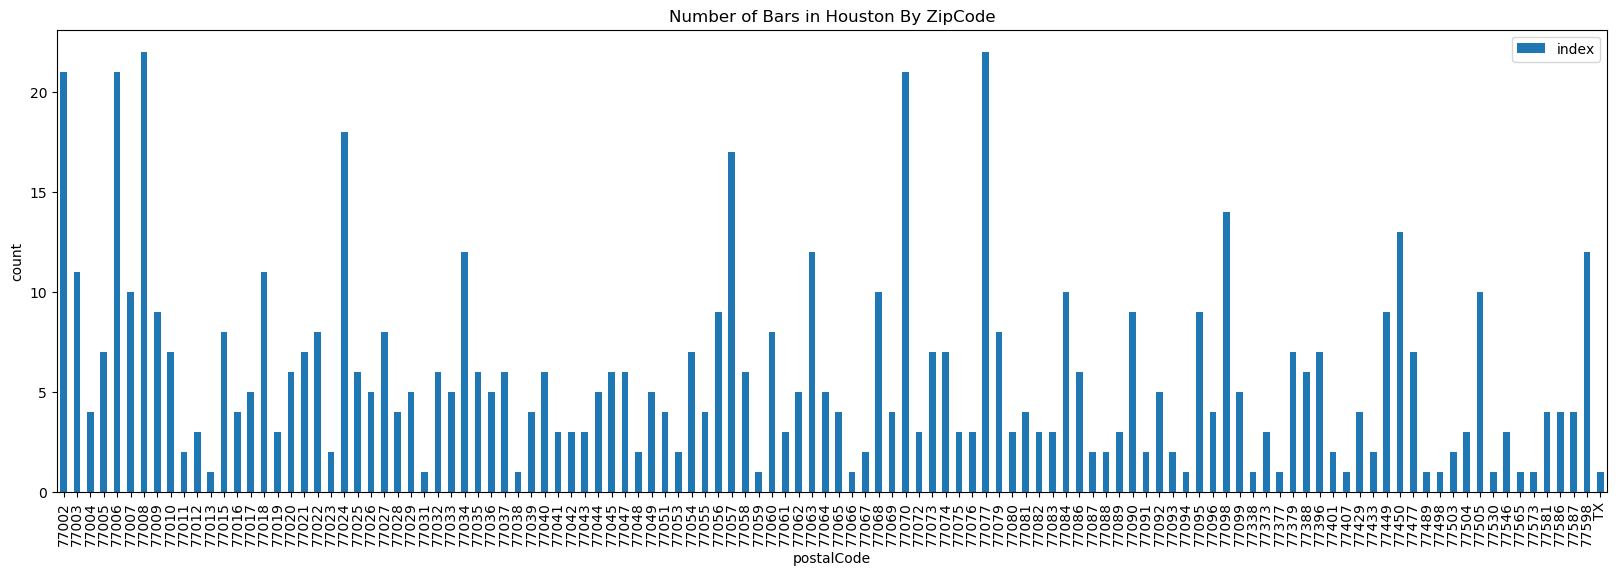

In [840]:
# import matplotlib.pyplot as plt
# ax = nobarspc1.plot.bar(x='location.postalCode', y='index', rot=0)


import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

#nobarspc1 = nobarspc1('index',ascending=False)

nobarspc1.plot(kind='bar', figsize=(20, 6))

plt.xlabel('postalCode') # add to x-label to the plot
plt.ylabel('count') # add y-label to the plot
plt.title('Number of Bars in Houston By ZipCode') # add title to the plot

plt.show()

In [841]:
bd1 = pd.get_dummies(bd[['categories']], prefix="", prefix_sep="")


bd1['location.postalCode'] = bd['location.postalCode'] 


fixed_columns = [bd1.columns[-1]] + list(bd1.columns[:-1])
bd1 = bd1[fixed_columns]

bd1.head()

,location.postalCode,American Restaurant,Arcade,Asian Restaurant,BBQ Joint,Bar,Beer Bar,Beer Garden,Beer Store,Bowling Alley,...,Strip Club,Sushi Restaurant,Tex-Mex Restaurant,Thai Restaurant,Tiki Bar,Travel Lounge,Vietnamese Restaurant,Whisky Bar,Wine Bar,Wings Joint
0,77009,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,77009,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,77013,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,77022,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,77026,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [842]:
bdg = bd1.groupby('location.postalCode').mean().reset_index()
bdg

,location.postalCode,American Restaurant,Arcade,Asian Restaurant,BBQ Joint,Bar,Beer Bar,Beer Garden,Beer Store,Bowling Alley,...,Strip Club,Sushi Restaurant,Tex-Mex Restaurant,Thai Restaurant,Tiki Bar,Travel Lounge,Vietnamese Restaurant,Whisky Bar,Wine Bar,Wings Joint
0,77002,0.000000,0.000000,0.0,0.0,0.380952,0.095238,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.047619,0.095238,0.000000
1,77003,0.000000,0.000000,0.0,0.0,0.272727,0.090909,0.090909,0.0,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
2,77004,0.000000,0.000000,0.0,0.0,0.750000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
3,77005,0.000000,0.000000,0.0,0.0,0.285714,0.142857,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.142857,0.000000
4,77006,0.000000,0.000000,0.0,0.0,0.190476,0.000000,0.047619,0.0,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.047619,0.000000
5,77007,0.100000,0.000000,0.0,0.0,0.300000,0.000000,0.000000,0.1,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.100000,0.000000
6,77008,0.045455,0.000000,0.0,0.0,0.181818,0.045455,0.045455,0.0,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.045455,0.000000,0.136364,0.000000
7,77009,0.000000,0.000000,0.0,0.0,0.444444,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.0,0.111111,0.0,0.000000,0.000000,0.111111,0.000000
8,77010,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
9,77011,0.000000,0.000000,0.0,0.0,0.500000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.500000,0.000000


In [844]:
# a=bdg
# a
# a=a.'location.postalCode'=='77002'
# a

In [845]:
bdg.shape

(116, 69)

In [846]:
num_top_venues = 10

for postalcode in bdg['location.postalCode']:
    print("----"+postalcode+"----")
    temp = bdg[bdg['location.postalCode'] == postalcode].T.reset_index()
    temp.columns = ['categories','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----77002----
                categories  freq
0                      Bar  0.38
1                 Wine Bar  0.10
2                 Beer Bar  0.10
3                   Lounge  0.10
4                Hotel Bar  0.10
5               Whisky Bar  0.05
6                Gastropub  0.05
7  New American Restaurant  0.05
8             Cocktail Bar  0.05
9              Coffee Shop  0.05


----77003----
            categories  freq
0                  Bar  0.27
1              Brewery  0.18
2         Cocktail Bar  0.09
3             Beer Bar  0.09
4          Beer Garden  0.09
5           Sports Bar  0.09
6           Hookah Bar  0.09
7            Nightclub  0.09
8  American Restaurant  0.00
9            Pool Hall  0.00


----77004----
                categories  freq
0                      Bar  0.75
1             Cocktail Bar  0.25
2      American Restaurant  0.00
3  New American Restaurant  0.00
4                Pool Hall  0.00
5              Pizza Place  0.00
6       Persian Restaurant  0.00
7       

                categories  freq
0                 Wine Bar   0.4
1                Nightclub   0.4
2                      Bar   0.2
3      American Restaurant   0.0
4              Music Venue   0.0
5                Pool Hall   0.0
6              Pizza Place   0.0
7       Persian Restaurant   0.0
8             Noodle House   0.0
9  New American Restaurant   0.0


----77027----
                  categories  freq
0    New American Restaurant  0.25
1                        Bar  0.25
2                Wings Joint  0.12
3                   Beer Bar  0.12
4         Italian Restaurant  0.12
5                 Restaurant  0.12
6      Vietnamese Restaurant  0.00
7                  Pool Hall  0.00
8  Middle Eastern Restaurant  0.00
9         Miscellaneous Shop  0.00


----77028----
                categories  freq
0                      Bar  0.75
1                   Lounge  0.25
2  New American Restaurant  0.00
3    Portuguese Restaurant  0.00
4                Pool Hall  0.00
5              Pizza P

                categories  freq
0                      Bar  0.75
1                 Wine Bar  0.25
2      American Restaurant  0.00
3              Music Venue  0.00
4                Pool Hall  0.00
5              Pizza Place  0.00
6       Persian Restaurant  0.00
7             Noodle House  0.00
8                Nightclub  0.00
9  New American Restaurant  0.00


----77053----
                categories  freq
0                 Wine Bar   0.5
1                Hotel Bar   0.5
2      American Restaurant   0.0
3              Music Venue   0.0
4              Pizza Place   0.0
5       Persian Restaurant   0.0
6             Noodle House   0.0
7                Nightclub   0.0
8  New American Restaurant   0.0
9                Multiplex   0.0


----77054----
             categories  freq
0                   Bar  0.29
1            Sports Bar  0.29
2            Hookah Bar  0.29
3  Caribbean Restaurant  0.14
4   American Restaurant  0.00
5             Nightclub  0.00
6             Pool Hall  0.00
7 

                categories  freq
0                      Bar  0.33
1            Movie Theater  0.33
2               Sports Bar  0.33
3      American Restaurant  0.00
4  New American Restaurant  0.00
5                Pool Hall  0.00
6              Pizza Place  0.00
7       Persian Restaurant  0.00
8             Noodle House  0.00
9                Nightclub  0.00


----77076----
                categories  freq
0                      Bar  0.67
1       Seafood Restaurant  0.33
2      American Restaurant  0.00
3  New American Restaurant  0.00
4                Pool Hall  0.00
5              Pizza Place  0.00
6       Persian Restaurant  0.00
7             Noodle House  0.00
8                Nightclub  0.00
9              Music Venue  0.00


----77077----
            categories  freq
0                  Bar  0.32
1                  Pub  0.18
2           Hookah Bar  0.09
3  American Restaurant  0.05
4    French Restaurant  0.05
5      Thai Restaurant  0.05
6           Sports Bar  0.05
7         

                categories  freq
0                 Dive Bar   1.0
1      American Restaurant   0.0
2  New American Restaurant   0.0
3                Pool Hall   0.0
4              Pizza Place   0.0
5       Persian Restaurant   0.0
6             Noodle House   0.0
7                Nightclub   0.0
8              Music Venue   0.0
9                   Lounge   0.0


----77373----
                categories  freq
0                      Bar  0.67
1               Sports Bar  0.33
2      American Restaurant  0.00
3  New American Restaurant  0.00
4                Pool Hall  0.00
5              Pizza Place  0.00
6       Persian Restaurant  0.00
7             Noodle House  0.00
8                Nightclub  0.00
9              Music Venue  0.00


----77377----
                categories  freq
0                 Wine Bar   1.0
1      American Restaurant   0.0
2              Music Store   0.0
3              Pizza Place   0.0
4       Persian Restaurant   0.0
5             Noodle House   0.0
6          

                categories  freq
0                  Brewery  0.25
1       Mexican Restaurant  0.25
2              Beer Garden  0.25
3               Sports Bar  0.25
4  New American Restaurant  0.00
5                Pool Hall  0.00
6              Pizza Place  0.00
7       Persian Restaurant  0.00
8             Noodle House  0.00
9                Nightclub  0.00


----77586----
                categories  freq
0                      Pub  0.25
1                 Wine Bar  0.25
2                      Bar  0.25
3               Sports Bar  0.25
4  New American Restaurant  0.00
5                Pool Hall  0.00
6              Pizza Place  0.00
7       Persian Restaurant  0.00
8             Noodle House  0.00
9                Nightclub  0.00


----77587----
                categories  freq
0                 Dive Bar   1.0
1      American Restaurant   0.0
2  New American Restaurant   0.0
3                Pool Hall   0.0
4              Pizza Place   0.0
5       Persian Restaurant   0.0
6          

In [847]:
df1 =nobarspc1.sort_values('index',ascending=False).head(5)
df1.index.values


#df1[['location.postalCode','index']]
# for col in df1.columns: 
#     print(col) 
#['location.postalCode']

array(['77008', '77077', '77002', '77070', '77006'], dtype=object)

In [848]:
top5bd=bd[bd['location.postalCode'].isin(df1.index.values)]
top5bd

,index,name,categories,location.address,location.lat,location.lng,location.postalCode
16,23,Dean's Downtown,Bar,316 Main St,29.761683,-95.361146,77002
19,27,Siphon Coffee,Coffee Shop,701 W Alabama St,29.738450,-95.388231,77006
20,28,Flying Saucer Draught Emporium,Beer Bar,705 Main St,29.759116,-95.363216,77002
22,30,Houston EAGLE,Gay Bar,611 Hyde Park Blvd,29.747281,-95.388884,77006
23,31,Red & White Wine Bistro,Wine Bar,Near Section 101,29.750101,-95.362623,77002
26,35,Anvil Bar & Refuge,Cocktail Bar,1424 Westheimer Rd,29.743013,-95.396784,77006
27,36,JR's Bar & Grill,Gay Bar,808 Pacific St,29.746883,-95.390095,77006
28,37,Little Woodrow's,Bar,2306 Brazos St,29.749884,-95.377304,77006
30,39,Ibiza Food and Wine Bar,Spanish Restaurant,2450 Louisiana St Ste 200,29.747313,-95.376710,77006
34,44,lobbibar At The Hyatt Regency Houston,Hotel Bar,1200 Louisiana St,29.756930,-95.369092,77002


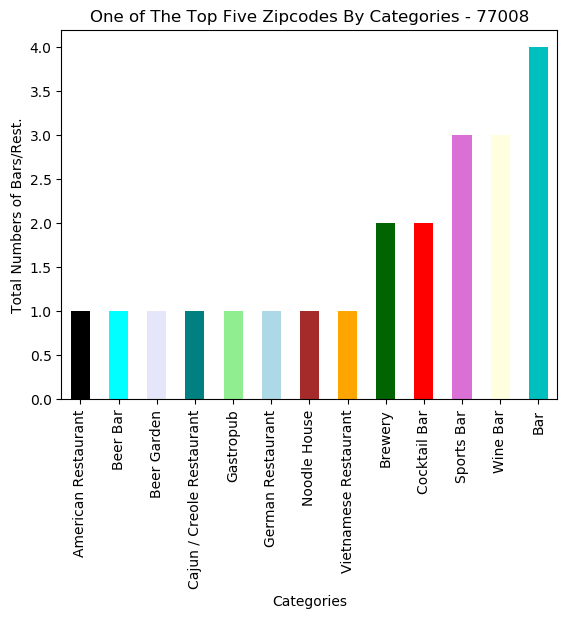

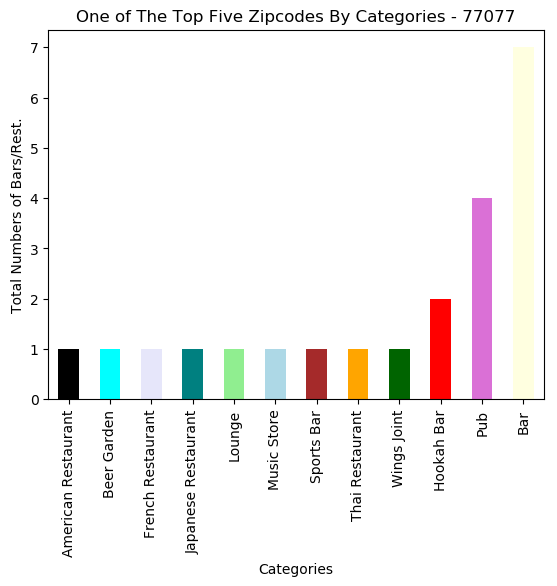

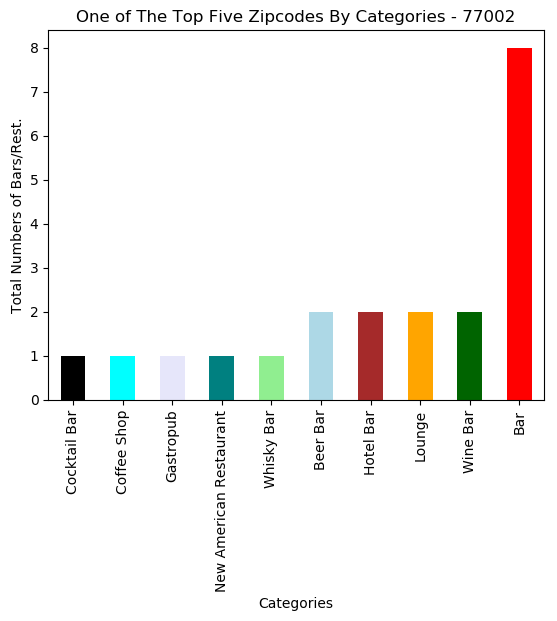

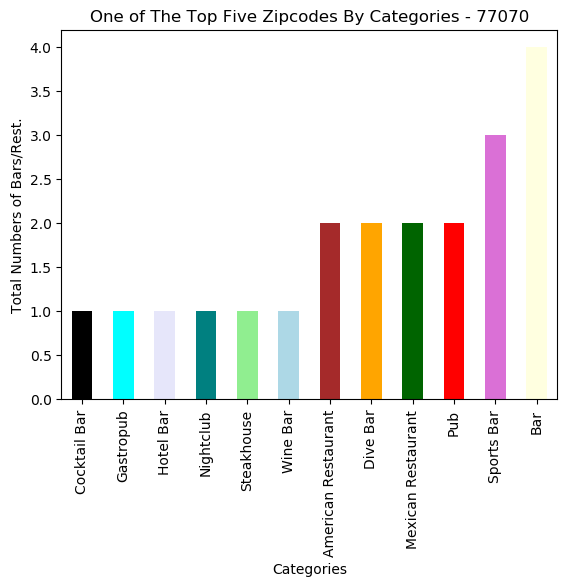

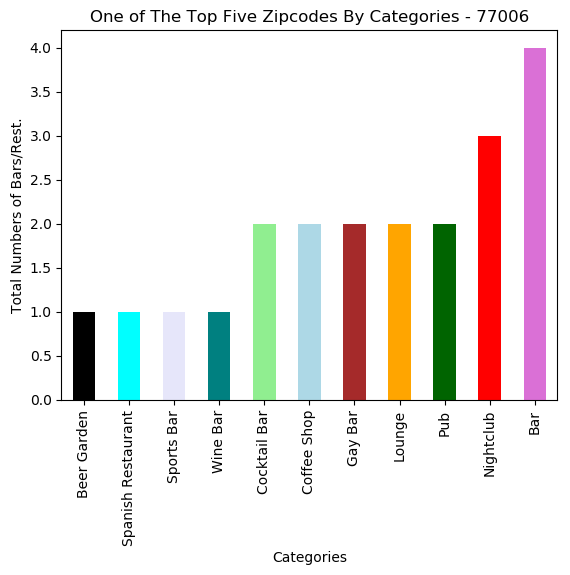

In [849]:
#top5bd.groupby(['location.postalCode','categories']).count().iloc[:,0]

for i in range(len(df1.index.values)): 
    t2 =top5bd.loc[top5bd['location.postalCode'] == df1.index.values[i]].groupby(['categories']).size().sort_values('index')
    #t1=top5bd(top5bd['location.postalCode'] == "77099").groupby(['categories']).size().sort_values('index')
#test = top5bd.groupby(['location.postalCode','categories'], as_index=False).count().iloc[:,0:3]
    t2.plot(x='location.postalCode', y=['categories'], kind="bar",
            color=['black','aqua', 'lavender', 'teal','lightgreen','lightblue','brown','orange','darkgreen','red','orchid','lightyellow','c'])
    plt.xlabel('Categories') # add to x-label to the plot
    plt.ylabel('Total Numbers of Bars/Rest.') # add y-label to the plot
    plt.title('One of The Top Five Zipcodes By Categories'+' - '+''.join(df1.index.values[i])) # add title to the plot
    plt.show()


#test

#t1=test.pivot(index='location.postalCode', columns='categories', values='index')

# #t1.plot(x='location.postalCode', y=['categories'], kind="bar")


#t1
# plt.show()


#pd.DataFrame(top5bd)

In [850]:
from folium.plugins import MarkerCluster


map_bd = folium.Map(location=[29.749907, -95.358421], zoom_start=11)

marker_cluster = MarkerCluster().add_to(map_bd)

#i=0
for lat, lng, label,zc in zip(top5bd['location.lat'], top5bd['location.lng'], top5bd['categories']+" - "+top5bd['name']+" - "+top5bd['location.postalCode'],top5bd['location.postalCode']):
        #if i < 1000:
            label = folium.Popup(label,parse_html=True)#parse_html=True
            #tooltip = "Zipcode:{} Click for more".format(top5bd['location.postalCode'][zc])
            #zc = folium.Popup(label,parse_html=True)
            #data=zc,
            #columns=['location.postalCode', col],
            folium.CircleMarker(
            [lat, lng],
            radius=5,
            popup=label,
            #color='light blue',
            fill=True,
            fill_color='OrRd',
            fill_opacity=0.7,
            line_opacity=0.3,
            parse_html=False,
            ).add_to(marker_cluster)#parse_html=True
            #i=i+1
       
    
map_bd

In [851]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]


num_top_venues = 5

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['location.postalCode']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
zipcode_sorted = pd.DataFrame(columns=columns)
zipcode_sorted['location.postalCode'] = bdg['location.postalCode']

for ind in np.arange(bdg.shape[0]):
    zipcode_sorted.iloc[ind, 1:] = return_most_common_venues(bdg.iloc[ind, :], num_top_venues)

zipcode_sorted

,location.postalCode,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,77002,Bar,Hotel Bar,Wine Bar,Lounge,Beer Bar
1,77003,Bar,Brewery,Beer Bar,Cocktail Bar,Sports Bar
2,77004,Bar,Cocktail Bar,Wings Joint,General Entertainment,Dive Bar
3,77005,Bar,Italian Restaurant,Hotel Bar,Wine Bar,Beer Bar
4,77006,Bar,Nightclub,Coffee Shop,Lounge,Cocktail Bar
5,77007,Bar,American Restaurant,Beer Store,Lounge,Gastropub
6,77008,Bar,Sports Bar,Wine Bar,Brewery,Cocktail Bar
7,77009,Bar,Wine Bar,Tiki Bar,Pub,Mexican Restaurant
8,77010,Hotel Bar,Gastropub,New American Restaurant,Sports Bar,Italian Restaurant
9,77011,Wine Bar,Bar,General Entertainment,Distillery,Dive Bar


In [852]:
#to get list of zip with city and county
#DO NOT DELETE

# html = requests.get('http://www.ciclt.net/sn/clt/capitolimpact/gw_ziplist.aspx?FIPS=48201').content
# df_list = pd.read_html(html)
# df_list
# houston_zipn = df_list[2]
# houston_zipn

In [853]:
ui=input('Please Enter The ZipCode You Are Interested In:'+str())

a1=zipcode_sorted[zipcode_sorted['location.postalCode']==ui]
a2=bd[bd['location.postalCode']==ui]
#print(a1)
display(a1)
#print(a2)
display(a2)

Please Enter The ZipCode You Are Interested In:77057


,location.postalCode,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
50,77057,Sports Bar,Bar,Mediterranean Restaurant,Pizza Place,Restaurant


,index,name,categories,location.address,location.lat,location.lng,location.postalCode
204,655,Prospect Park Restaurant,Sports Bar,3100 Fountain View Dr,29.732704,-95.484500,77057
205,656,Stereo Live,Concert Hall,6400 Richmond Ave,29.732067,-95.498761,77057
210,663,Cafe Mawal,Mediterranean Restaurant,6006 Fairdale Ln,29.733527,-95.484738,77057
211,664,Diablo Loco Sports Bar,Restaurant,6025 Richmond Ave,29.731457,-95.486287,77057
212,665,Wasfi's Grill and Hookah,Mediterranean Restaurant,6110 Richmond Ave,29.732004,-95.487880,77057
217,671,Wild West Houston,Bar,6101 Richmond Ave,29.731135,-95.487575,77057
219,673,Dave & Buster's,Sports Bar,"6010 Richmond Ave,",29.732015,-95.485462,77057
224,678,Barry's Pizza,Pizza Place,6003 Richmond Ave,29.731066,-95.484467,77057
225,679,Tragos Lounge,Lounge,5887 Westheimer Rd,29.737657,-95.484030,77057
560,2061,Slick Willie's Family Pool Hall,Pool Hall,5913 Westheimer Rd,29.737461,-95.485905,77057
